# Trabajo Práctico - Septiembre 2025
## Minería de Datos
### Integrantes:
- Irma Carolina Ruíz
- Miranda Pilar Onega
- Rocío Quispe

### Librerías

In [1]:


# Análisis exploratorio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Preparación de los datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, TSNE

# Algoritmos de clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage


# Métricas
from sklearn.metrics import silhouette_score,silhouette_samples

### **Carga de dataset**

In [2]:
!gdown 1E6mabL3KKaYM1Y_6rmatq-bza80kJL5_

Downloading...
From: https://drive.google.com/uc?id=1E6mabL3KKaYM1Y_6rmatq-bza80kJL5_
To: /content/SmartFarmingCropYield.csv
100% 25.9k/25.9k [00:00<00:00, 41.6MB/s]


In [3]:
datos = pd.read_csv("SmartFarmingCropYield.csv")

In [4]:
datos.head()

,tipoCultivo,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,tipoRiego,tipoFertilizante,mlPesticida,diasTotales,rendimientoKg_hectarea,indiceNDVI,estadoEnfermedadesCultivo
0,Trigo,35.95,5.99,17.79,75.62,77.03,7.27,NaN,Organico,6.34,122,4408.07,0.63,Leve
1,Soja,19.74,7.24,30.18,89.91,61.13,5.67,Aspersor,Inorganico,9.60,112,5389.98,0.58,NaN
2,Trigo,29.32,7.16,27.37,265.43,68.87,8.23,Goteo,Mixto,15.26,144,2931.16,0.80,Leve
3,Maiz,17.33,6.03,33.73,212.01,70.46,5.03,Aspersor,Organico,25.80,134,4227.80,0.44,NaN
4,Soja,36.28,7.04,21.80,123.38,47.91,4.02,Manual,Mixto,39.29,145,4501.20,0.76,NaN


### **Análisis Exploratorio de Datos**

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tipoCultivo                 311 non-null    object 
 1    humedadSuelo(%)            311 non-null    float64
 2    pHSuelo                    311 non-null    float64
 3    temperatura(°C)            311 non-null    float64
 4    precipitacion(mm)          311 non-null    float64
 5    humedad(%)                 311 non-null    float64
 6    horasLuzSolar              311 non-null    float64
 7    tipoRiego                  220 non-null    object 
 8    tipoFertilizante           311 non-null    object 
 9    mlPesticida                311 non-null    float64
 10   diasTotales                311 non-null    int64  
 11   rendimientoKg_hectarea     311 non-null    float64
 12   indiceNDVI                 311 non-null    float64
 13   estadoEnfermedadesCultivo  228 non

#### Distribución de columnas con valores numéricos

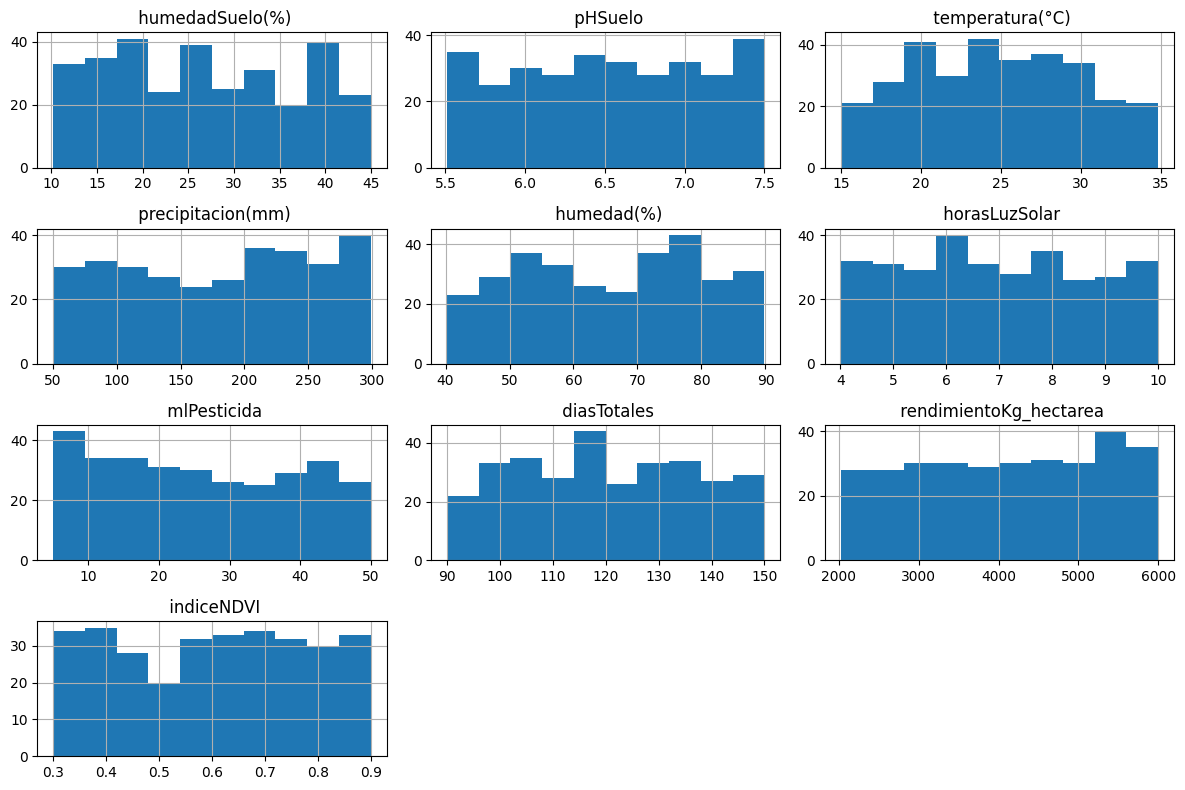

In [6]:
datos.hist(figsize=(12, 8))
plt.tight_layout()

Las variables tienen distribuciones diferentes, no normales y en distintas escalas.

#### Distribución de columnas con datos nulos: tipoRiego y estadoEnfermedadesCultivo

In [7]:
tipo_riego = datos.copy()
tipo_riego[' tipoRiego'] = tipo_riego[' tipoRiego'].fillna('Nulo')

/tmp/ipython-input-2296586407.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tipo_riego, x=' tipoRiego', order=tipo_riego[' tipoRiego'].value_counts().index, palette='viridis')


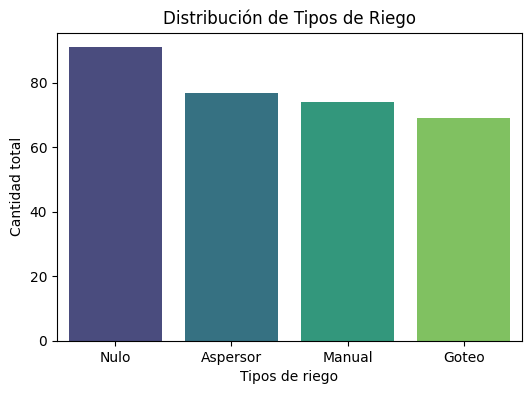

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(data=tipo_riego, x=' tipoRiego', order=tipo_riego[' tipoRiego'].value_counts().index, palette='viridis')
plt.xlabel('Tipos de riego')
plt.ylabel('Cantidad total')
plt.title('Distribución de Tipos de Riego')
plt.show()

In [9]:
enferm_cultivo = datos.copy()
enferm_cultivo[' estadoEnfermedadesCultivo'] = enferm_cultivo[' estadoEnfermedadesCultivo'].fillna('Nulo')

/tmp/ipython-input-2121158676.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=enferm_cultivo, x=' estadoEnfermedadesCultivo', order=enferm_cultivo[' estadoEnfermedadesCultivo'].value_counts().index, palette='viridis')


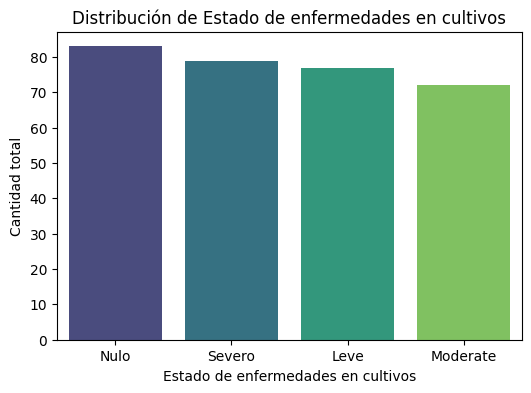

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(data=enferm_cultivo, x=' estadoEnfermedadesCultivo', order=enferm_cultivo[' estadoEnfermedadesCultivo'].value_counts().index, palette='viridis')
plt.xlabel('Estado de enfermedades en cultivos')
plt.ylabel('Cantidad total')
plt.title('Distribución de Estado de enfermedades en cultivos')
plt.show()

Se trabaja con categorías reconocidas en ambas variables al no poder imputarse los valores nulos sin información extra o asesoramiento acorde. Por lo tanto, se eliminarán los datos nulos.

#### Visualización de datos en búsqueda de outliers

In [11]:
col_num = datos[[' humedadSuelo(%)', ' pHSuelo', ' temperatura(°C)',
       ' precipitacion(mm)', ' humedad(%)', ' horasLuzSolar', ' mlPesticida', ' diasTotales',
       ' rendimientoKg_hectarea', ' indiceNDVI']]

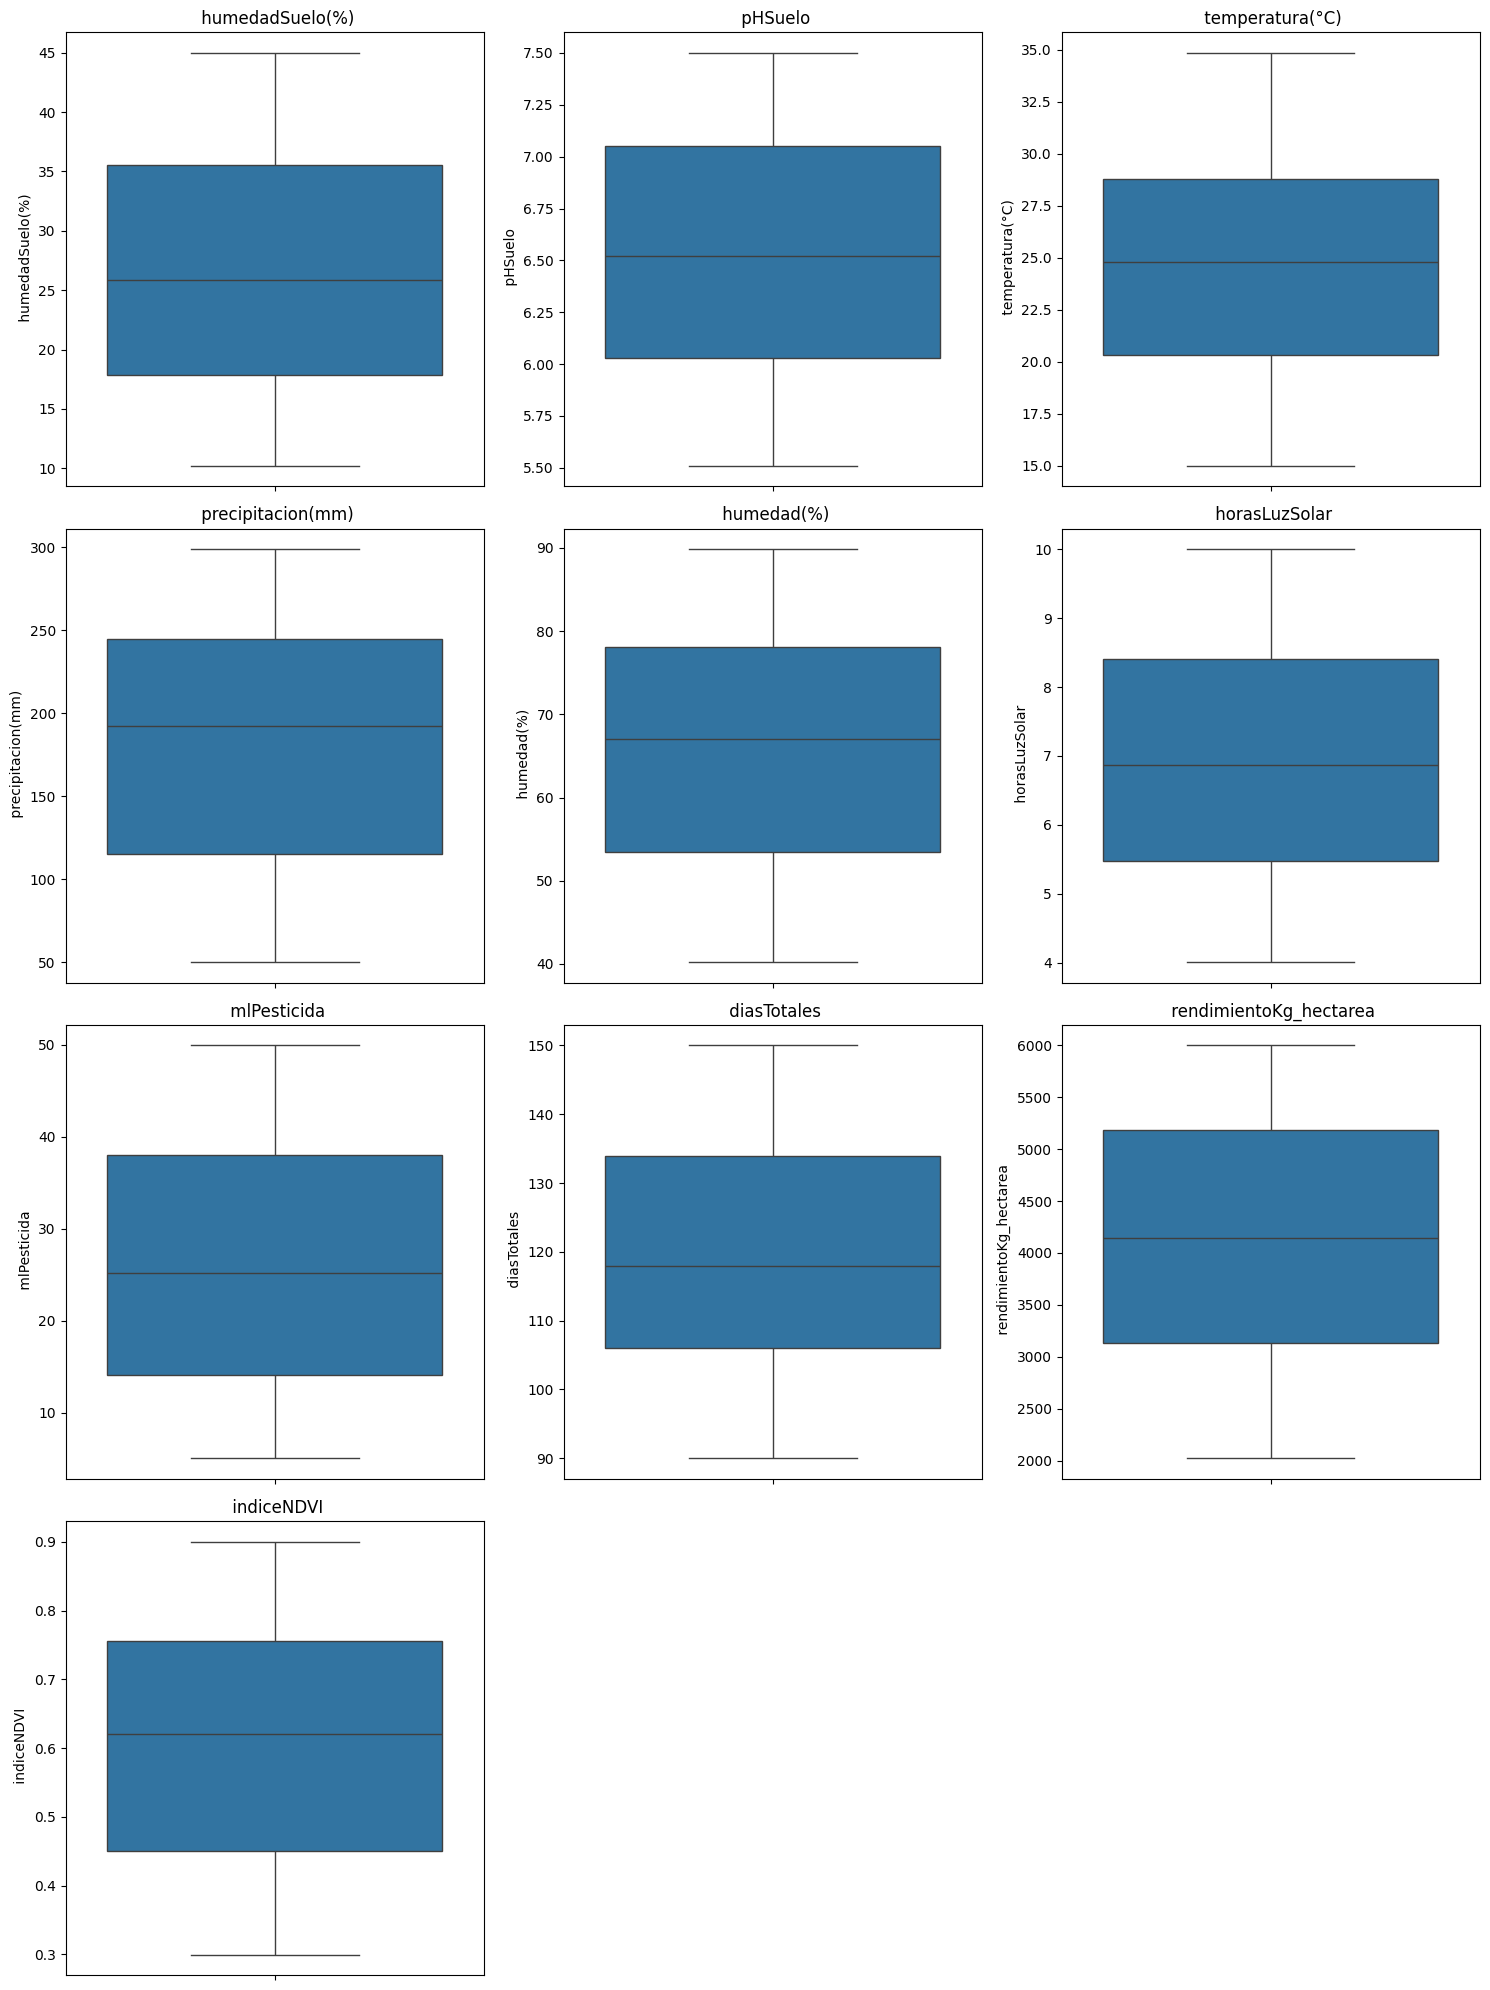

In [12]:
import math
n = len(col_num.columns)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
axes = axes.flatten()

for i, col in enumerate(col_num.columns):
    sns.boxplot(data=col_num, y=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Los boxplots de las variables numéricas no presentan outliers. Por lo tanto, no se modificaran los mismos.

### **Limpieza de datos**

Se notaron espacios de más en varios nombres de columnas. Se borran y se evitan caracteres no usuales en los mismos.

In [13]:
datos.columns

Index(['tipoCultivo', ' humedadSuelo(%)', ' pHSuelo', ' temperatura(°C)',
       ' precipitacion(mm)', ' humedad(%)', ' horasLuzSolar', ' tipoRiego',
       ' tipoFertilizante', ' mlPesticida', ' diasTotales',
       ' rendimientoKg_hectarea', ' indiceNDVI', ' estadoEnfermedadesCultivo'],
      dtype='object')

In [14]:
datos.columns = ['tipoCultivo', 'humedadSuelo_porc', 'pHSuelo', 'temperatura_c',
       'precipitacion_mm', 'humedad_porc', 'horasLuzSolar', 'tipoRiego',
       'tipoFertilizante', 'mlPesticida', 'diasTotales',
       'rendimientoKg_hectarea', 'indiceNDVI', 'estadoEnfermedadesCultivo']

In [15]:
print(f'Cantidad de registros sin tipos de riego ni estado de enfermedades en cultivos, dentro de los {len(datos)} disponibles:')
len(datos[datos['tipoRiego'].isna() & datos['estadoEnfermedadesCultivo'].isna()])

Cantidad de registros sin tipos de riego ni estado de enfermedades en cultivos, dentro de los 311 disponibles:


26

Se eliminan los 26 registros captados.

In [16]:
datos_limpios = datos.dropna(subset=['tipoRiego', 'estadoEnfermedadesCultivo'], how='all')

In [17]:
len(datos_limpios)

285

#### Estandarización de datos numéricos

En la visualización de datos numéricos se notó que las escalas entre las variables son distintas y las distribuciones no son cercanas a la normal. Se elige usar **StandardScaler de Scikit-learn**.

In [18]:
datos_limp_num = datos_limpios.copy()

In [19]:
datos_limp_num = datos_limp_num.drop(columns=['tipoCultivo', 'tipoRiego', 'tipoFertilizante', 'estadoEnfermedadesCultivo'])

In [20]:
scaler = StandardScaler()

In [21]:
datos_num_esc = pd.DataFrame(scaler.fit_transform(datos_limp_num), columns=datos_limp_num.columns)

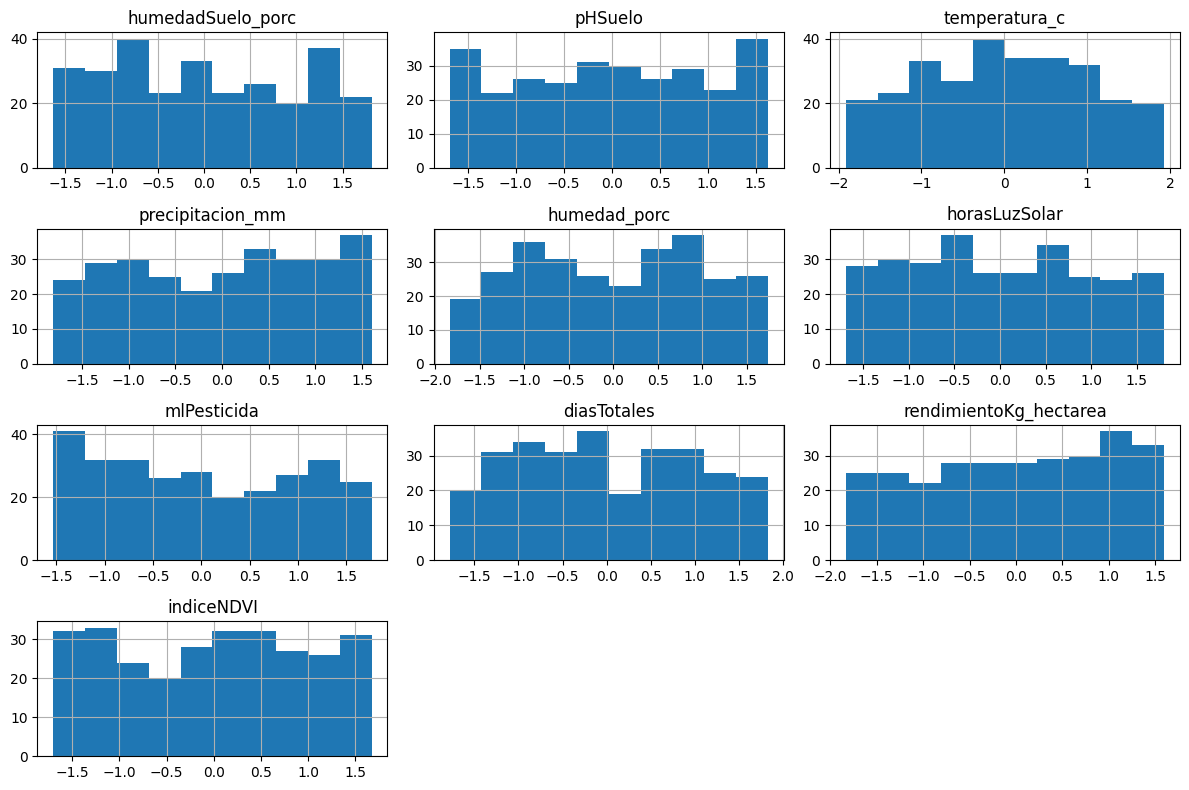

In [22]:
datos_num_esc.hist(figsize=(12, 8))
plt.tight_layout()

Se concatenan los datos escalados y las variables categóricas, que no se modificaron.

In [23]:
datos_esc = pd.concat([datos_limpios[['tipoCultivo', 'tipoRiego', 'tipoFertilizante', 'estadoEnfermedadesCultivo']].reset_index(drop=True),
    datos_num_esc.reset_index(drop=True)], axis=1)

Teniendo en cuenta que tipoCultivo va a ser la variable objetivo, se opta por apartarla del resto de variables, que aun deben ser imputadas.

In [24]:
y = datos_esc['tipoCultivo']

In [25]:
datos_esc = datos_esc.drop(columns=['tipoCultivo'])

Se procede revisar de nuevo los nulos de tipoRiego y estadoEnfermedadesCultivo.

In [26]:
datos_esc['tipoRiego'].value_counts(dropna=False)

,count
tipoRiego,
Aspersor,77
Manual,74
Goteo,69
NaN,65


In [27]:
datos_esc['estadoEnfermedadesCultivo'].value_counts(dropna=False)

,count
estadoEnfermedadesCultivo,
Severo,79
Leve,77
Moderate,72
NaN,57


Se procede a eliminar los faltantes de ambas categorias.

In [28]:
datos_esc["tipoRiego"].dropna(inplace=True)
datos_esc["estadoEnfermedadesCultivo"].dropna(inplace=True)

Se crean variables dummies por las variables categóricas.

In [29]:
col_categ = ['tipoRiego', 'tipoFertilizante', 'estadoEnfermedadesCultivo']

In [30]:
datos_esc_dum = pd.get_dummies(datos_esc, columns=col_categ, drop_first=False, dtype=int)

In [31]:
datos_final = datos_esc_dum.copy()

#### Versión final del Dataset

In [32]:
datos_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   humedadSuelo_porc                   285 non-null    float64
 1   pHSuelo                             285 non-null    float64
 2   temperatura_c                       285 non-null    float64
 3   precipitacion_mm                    285 non-null    float64
 4   humedad_porc                        285 non-null    float64
 5   horasLuzSolar                       285 non-null    float64
 6   mlPesticida                         285 non-null    float64
 7   diasTotales                         285 non-null    float64
 8   rendimientoKg_hectarea              285 non-null    float64
 9   indiceNDVI                          285 non-null    float64
 10  tipoRiego_Aspersor                  285 non-null    int64  
 11  tipoRiego_Goteo                     285 non-n

### **PCA**

In [33]:
from sklearn.decomposition import PCA

In [34]:
x = datos_final.copy()

In [35]:
pca = PCA(n_components=None)

In [36]:
pca.fit(x)

PCA()

In [37]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

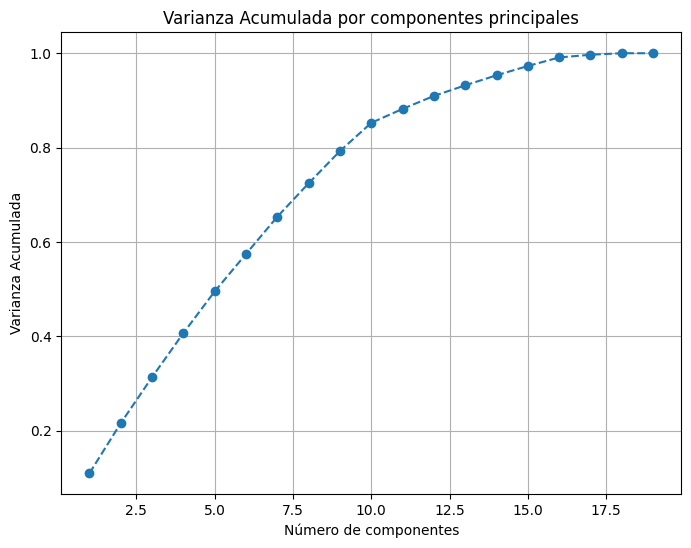

In [38]:
plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Varianza Acumulada por componentes principales')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza Acumulada')
plt.grid(True)
plt.show()

Si se busca un punto donde la pendiente comienza a aplanarse significativamente, se podría considerar que el "codo" se encuentra alrededor del componente 10, apróx.

In [39]:
n_components = 10
pca_final = PCA(n_components=n_components)
X_pca = pca_final.fit_transform(x)

In [40]:
# X_pca pasa a ser un dataframe
nombres_cols = [f'PC{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(X_pca, columns=nombres_cols)

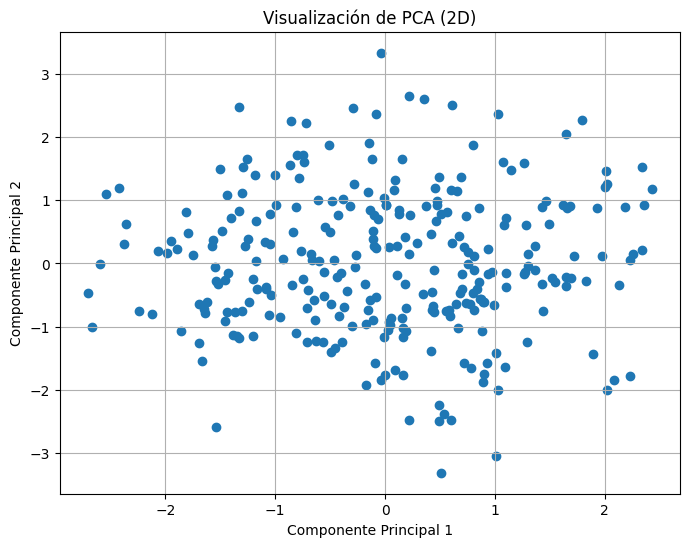

In [41]:
# Gráfico 2D
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.title('Visualización de PCA (2D)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

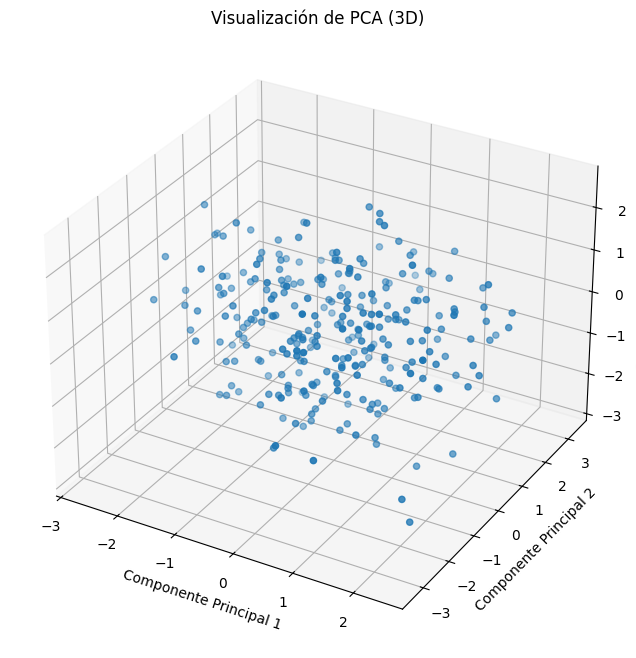

In [42]:
# Gráfico 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'])
ax.set_title('Visualización de PCA (3D)')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.show()

Se observa que los puntos están bastante dispersos en todas direcciones, sin que aparezcan grupos muy definidos a simple vista. Esto indica que los datos no presentan una separación clara en solo dos dimensiones. En el segundo caso, la distribución sigue siendo relativamente compacta y homogénea, aunque con algo más de dispersión en el espacio tridimensional.

### **Isomap**

In [43]:
isomap = Isomap(n_neighbors=6, n_components=4)
X_reduced = isomap.fit_transform(x)

In [44]:
X_reduced.shape

(285, 4)

In [45]:
df_isomap = pd.DataFrame(X_reduced, columns=['PC1', 'PC2', 'PC3', 'PC4'])

In [46]:
df_isomap['tipoCultivo'] = y

In [47]:
# Mostrar ISOMAP con y discreto
fig_isomap_2d = px.scatter(df_isomap, x='PC1', y='PC2', color = y,
                    labels = {'color':'tipoCultivo', 0:'PC1',1:'PC2'},
                    title='ISOMAP con 6 vecinos y 4 componentes')
fig_isomap_2d.show() #no están relacionadas las componentes de isomap

In [48]:
isomap = Isomap(n_neighbors=10, n_components=3)
X_reduced = isomap.fit_transform(x)

In [49]:
X_reduced.shape

(285, 3)

In [50]:
df_isomap = pd.DataFrame(X_reduced, columns=['PC1', 'PC2', 'PC3'])

In [51]:
df_isomap['tipoCultivo'] = y

In [52]:
# Mostrar ISOMAP con y discreto
fig_isomap_2d = px.scatter(df_isomap, x='PC1', y='PC2', color = y,
                    labels = {'color':'tipoCultivo', 0:'PC1',1:'PC2'},
                    title='ISOMAP con 10 vecinos y 3 componentes')
fig_isomap_2d.show() #no están relacionadas las componentes de isomap
#

Como en el caso anterior, Isomap muestra que la estructura entre cultivos no es fácilmente separable. Usar pocos vecinos resalta más variabilidad, mientras que con más vecinos la representación se hace más homogénea, pero sin distinguir grupos claros.

### **TSNE**

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
# Se codifica solo para colorear
le = LabelEncoder()
y_enc = le.fit_transform(y)
classes = le.classes_
classes

array(['Maiz', 'Soja', 'Trigo'], dtype=object)

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



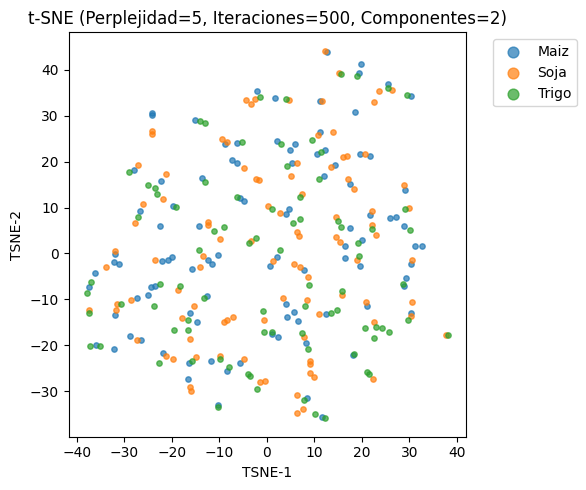

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



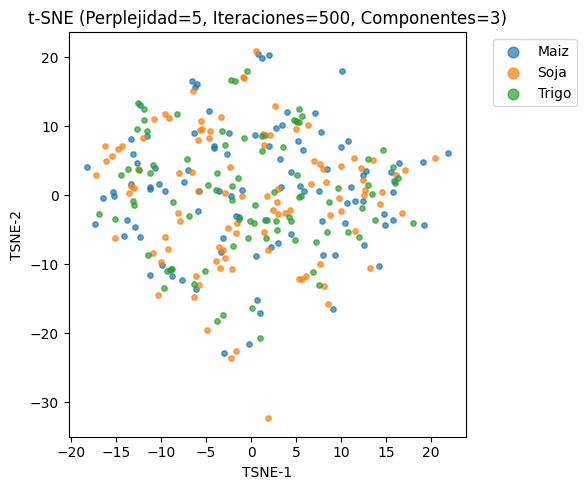

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



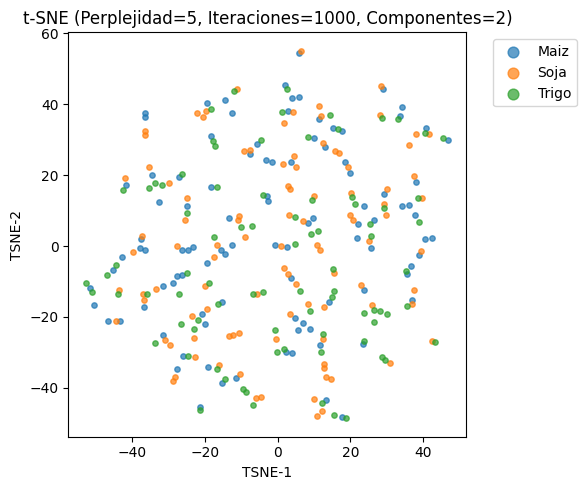

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



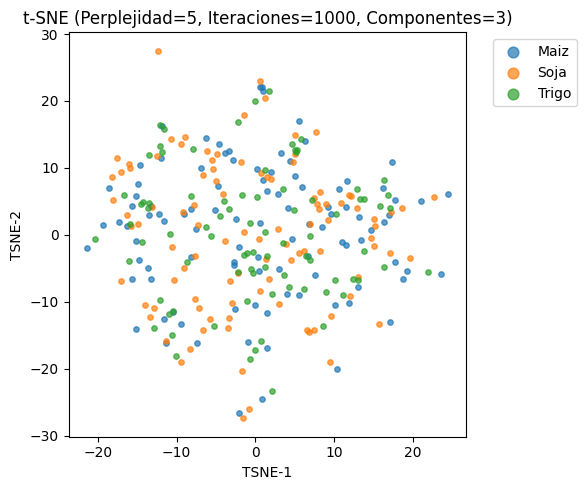

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



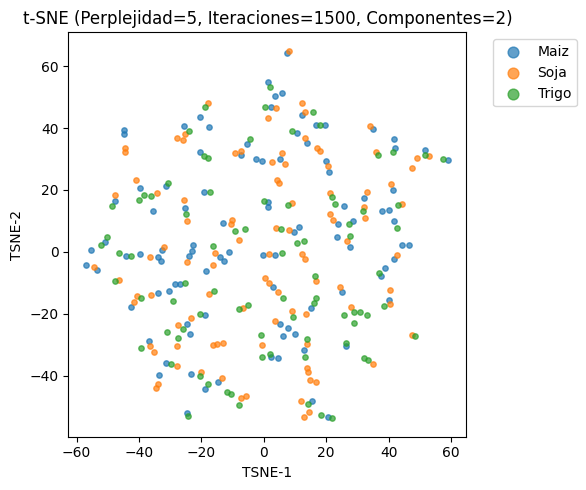

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



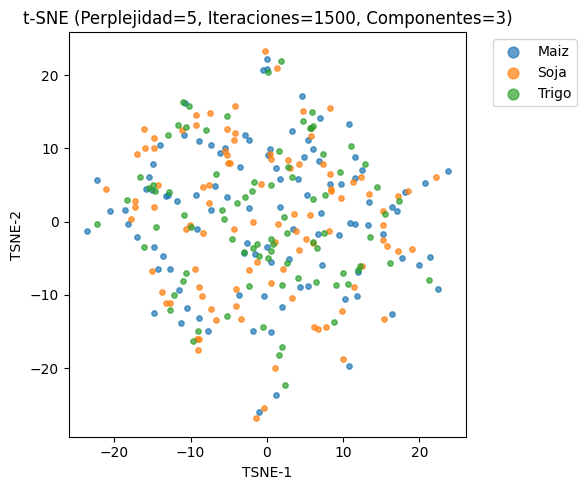

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



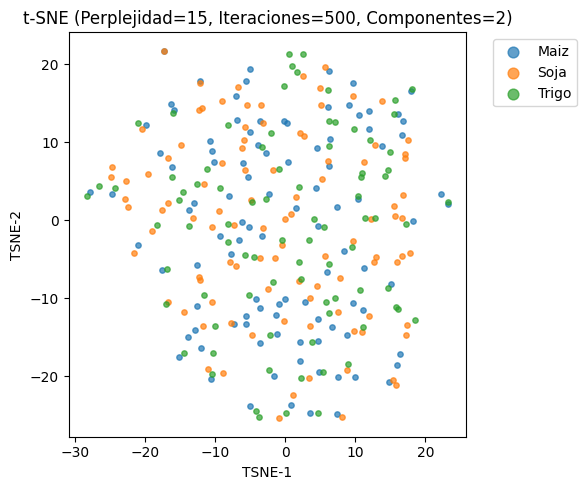

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



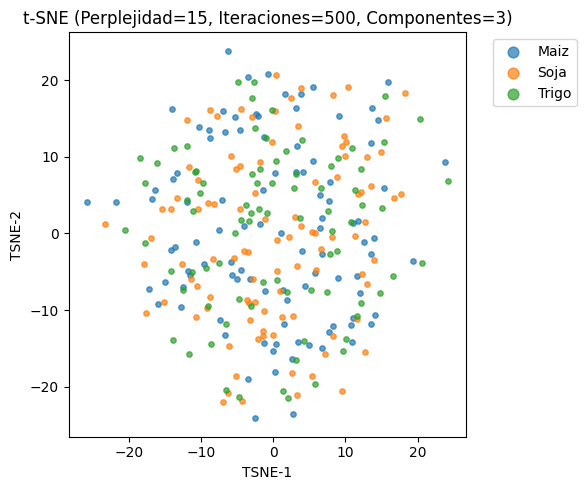

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



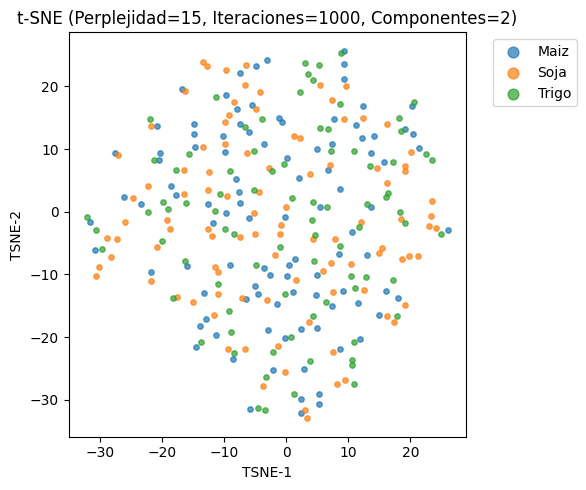

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



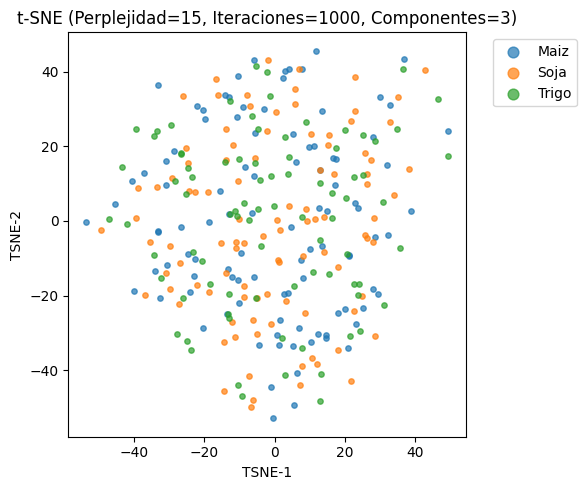

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



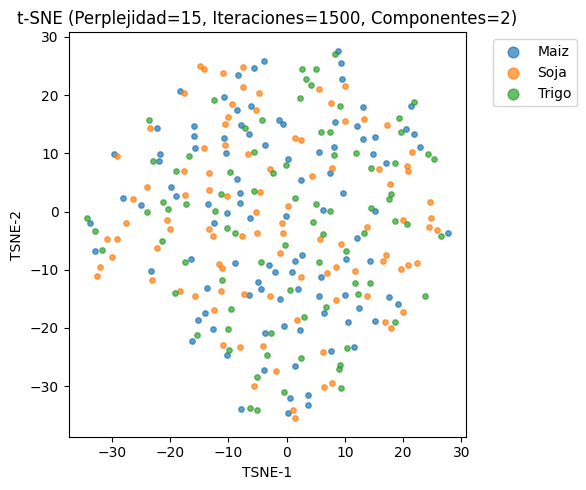

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



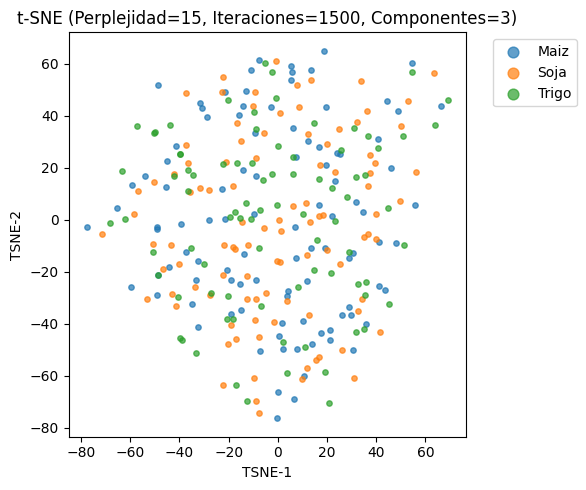

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



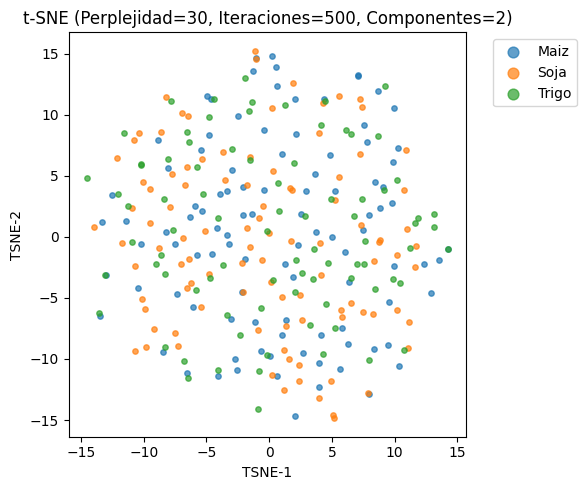

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



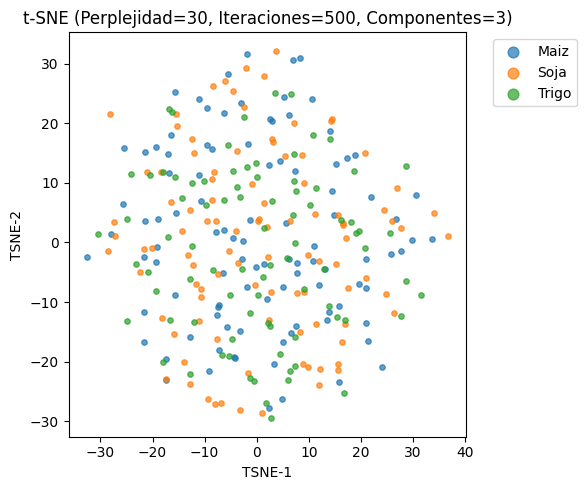

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



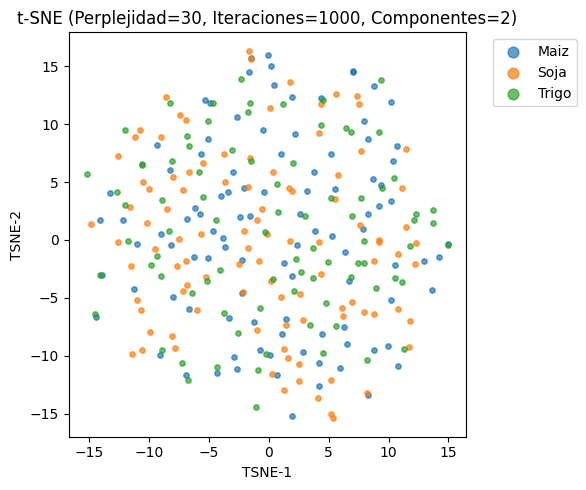

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



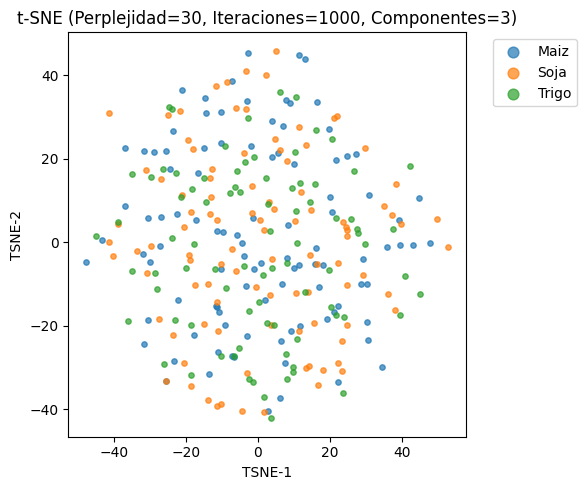

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



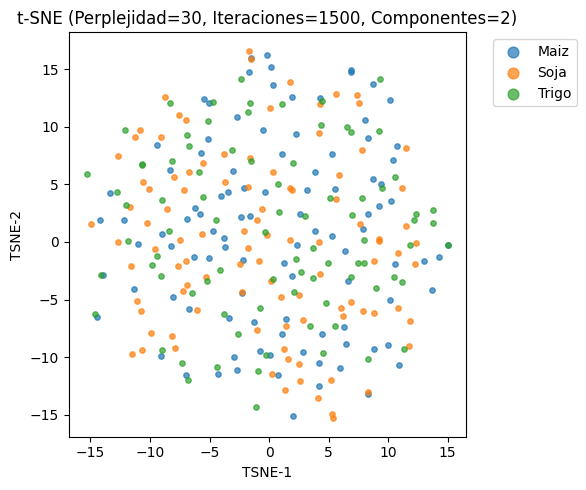

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



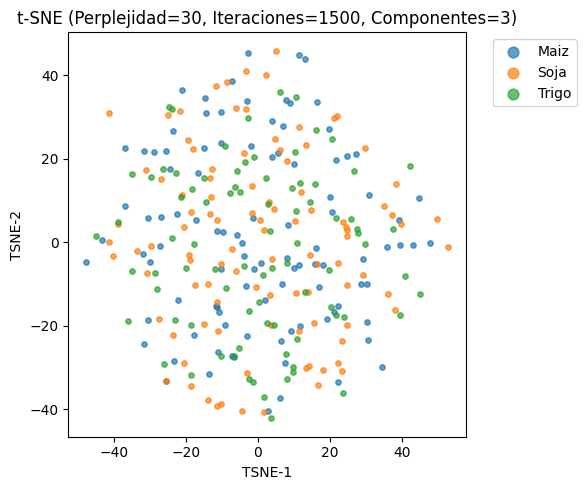

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



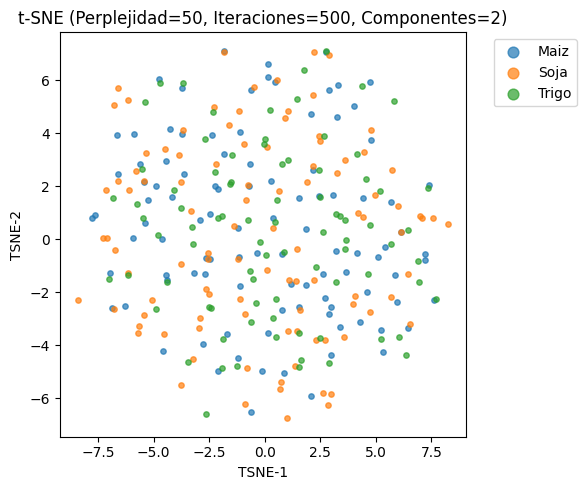

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



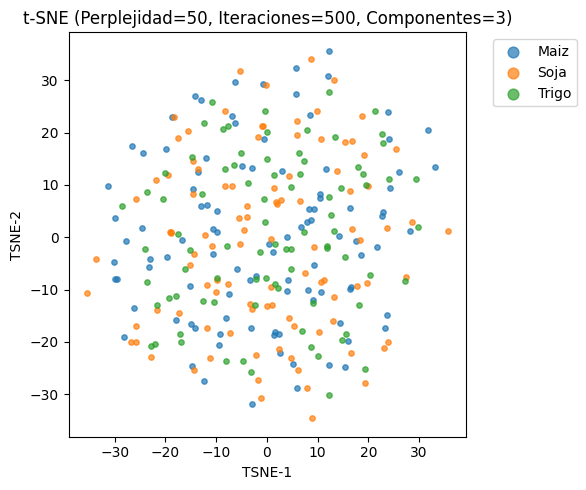

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



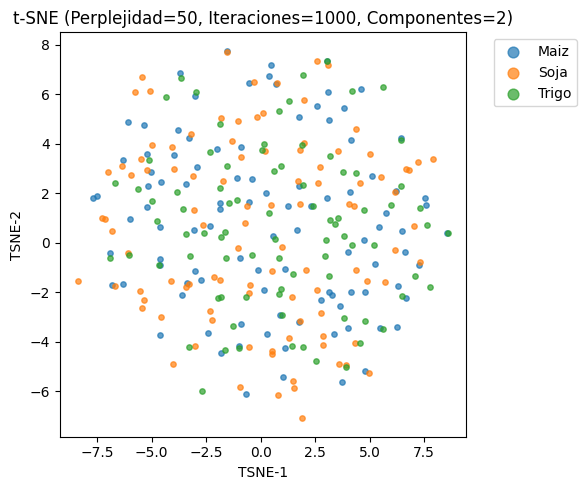

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



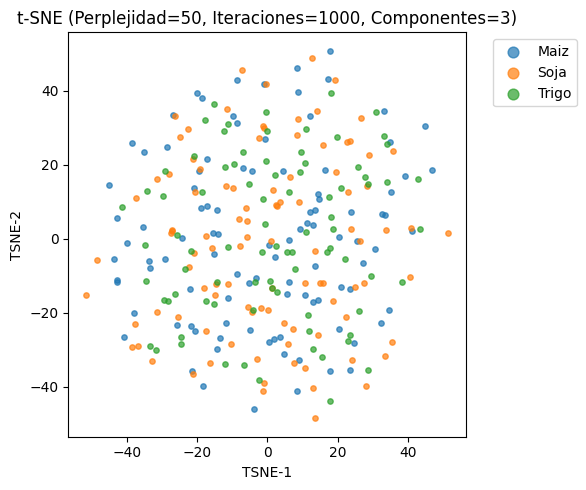

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



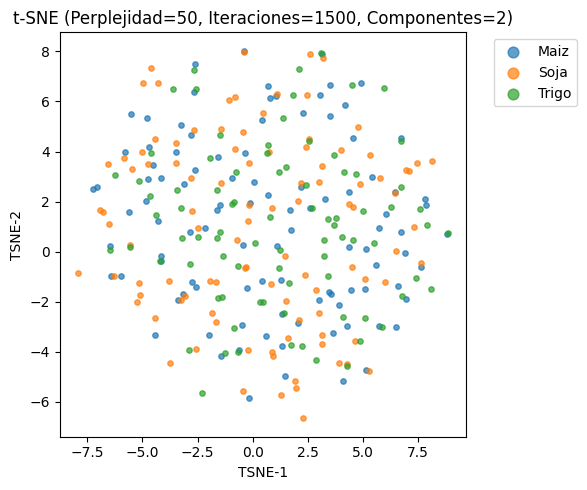

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



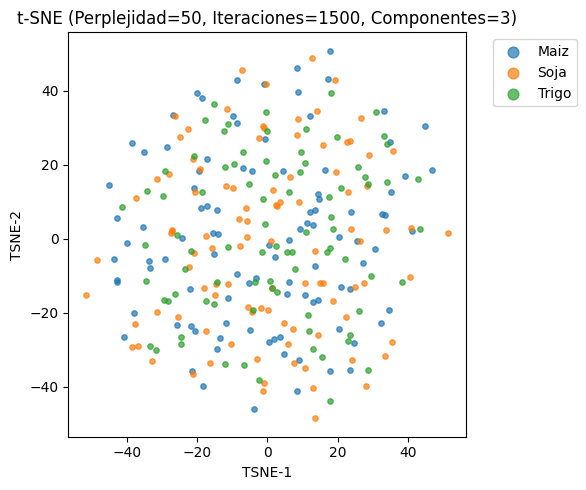

In [55]:
perplej = [5, 15, 30, 50]
n_iters = [500, 1000, 1500]
compon = [2, 3]

for perp in perplej:
    for n_iter in n_iters:
        for n_comp in compon:

            tsne = TSNE(
                n_components=n_comp,
                perplexity=perp,
                n_iter=n_iter,
                init="pca",
                learning_rate="auto",
                random_state=42)
            x_emb = tsne.fit_transform(x)


            plt.figure(figsize=(6, 5))
            for class_idx, class_name in enumerate(classes):
                mask = (y_enc == class_idx)
                plt.scatter(x_emb[mask,0], x_emb[mask,1],
                            s=15, alpha=0.7, label=class_name)
            plt.legend(markerscale=2, bbox_to_anchor=(1.05,1), loc='upper left')
            plt.title(f"t-SNE (Perplejidad={perp}, Iteraciones={n_iter}, Componentes={n_comp})")
            plt.xlabel("TSNE-1"); plt.ylabel("TSNE-2")
            plt.tight_layout()
            plt.show()

En todos los gráficos, tSNE logra una representación más no lineal y muestra cierto agrupamiento local, pero los cultivos siguen apareciendo mezclados, lo que sugiere que sus variables no permiten distinguir fácilmente clases bien separadas.

### **K-means**

In [56]:
X = datos_final.copy()
X.head()

,humedadSuelo_porc,pHSuelo,temperatura_c,precipitacion_mm,humedad_porc,horasLuzSolar,mlPesticida,diasTotales,rendimientoKg_hectarea,indiceNDVI,tipoRiego_Aspersor,tipoRiego_Goteo,tipoRiego_Manual,tipoFertilizante_Inorganico,tipoFertilizante_Mixto,tipoFertilizante_Organico,estadoEnfermedadesCultivo_Leve,estadoEnfermedadesCultivo_Moderate,estadoEnfermedadesCultivo_Severo
0,0.916515,-0.890554,-1.373656,-1.460469,0.814166,0.209343,-1.437766,0.143382,0.223345,0.154208,0,0,0,0,0,1,1,0,0
1,-0.690499,1.194214,1.026566,-1.264514,-0.332467,-0.722887,-1.198711,-0.458443,1.069824,-0.126798,1,0,0,1,0,0,0,0,0
2,0.259235,1.060789,0.482206,1.142340,0.225706,0.768680,-0.783665,1.467397,-1.049860,1.109630,0,1,0,0,1,0,1,0,0
3,-0.929420,-0.823842,1.714281,0.409807,0.340369,-1.095778,-0.010770,0.865572,0.067939,-0.913616,1,0,0,0,0,1,0,0,0
4,0.949230,0.860651,-0.596829,-0.805550,-1.285831,-1.684248,0.978447,1.527579,0.303630,0.884825,0,0,1,0,1,0,0,0,0


In [57]:
# Se elige n3 variables para poder visualizar en 3 dimensiones
column_names = ["humedadSuelo_porc", "pHSuelo", "temperatura_c"]
X_reducido = X[column_names]
X_reducido.head()

,humedadSuelo_porc,pHSuelo,temperatura_c
0,0.916515,-0.890554,-1.373656
1,-0.690499,1.194214,1.026566
2,0.259235,1.060789,0.482206
3,-0.929420,-0.823842,1.714281
4,0.949230,0.860651,-0.596829


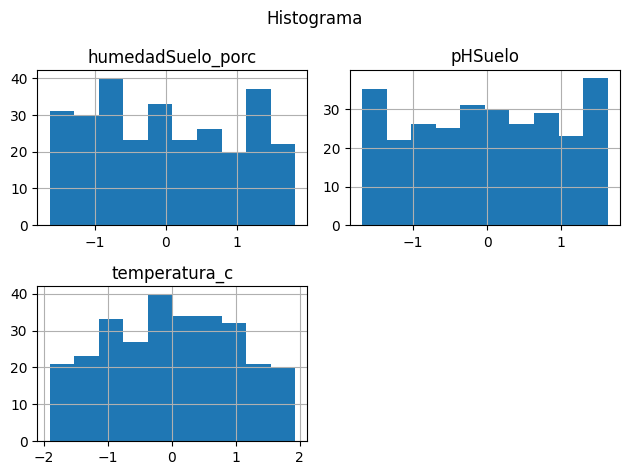

In [58]:
X_reducido.hist()
plt.suptitle('Histograma')
plt.tight_layout()
plt.show()

#### Selección de k

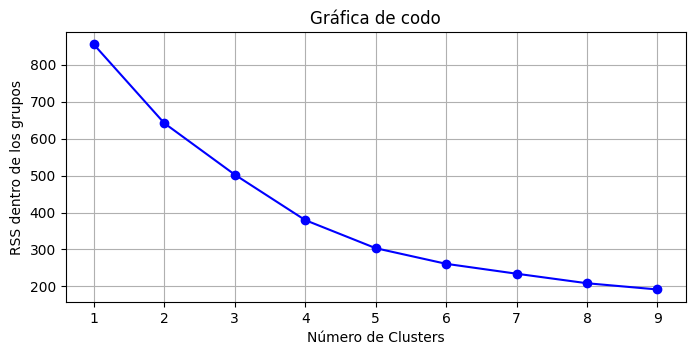

In [59]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=k, random_state=42).fit(X_reducido) for k in Nc]

# La suma de residuos cuadrados intra grupos de kMeans en sklearn se guarda en
# el atributo inertia
inertias = [model.inertia_ for model in kmeans]

plt.figure(figsize=(8, 3.5))
plt.plot(Nc,inertias, "bo-")
plt.xlabel('Número de Clusters')
plt.ylabel('RSS dentro de los grupos')
plt.title('Gráfica de codo')
plt.grid()
plt.show()

#### GAP

In [60]:
def calculate_intra_cluster_dispersion(X, k):
    kmeans = KMeans(n_clusters=k) # Aplica K-means
    kmeans.fit(X_reducido)
    return kmeans.inertia_ # Retorna la suma de distancias al centroide

In [61]:
gaps = []
max_k = 10

# Calcula el Gap Statistic para determinar el número óptimo de clusters

for k in range(1, max_k + 1):
    # Calculo la inercia real sobre mis datos reales
    real_inertia = calculate_intra_cluster_dispersion(X_reducido, k)
    #Calculo la inercia de datos aleatorios con la misma estructura que mis datos originales
    inertia_list = []
    for _ in range(10): # NUNCA PONER MENOS DE 10, ENTRE 10 Y 50
      random_data = np.random.rand(*X_reducido.shape)
      intra_cluster_dispersion = calculate_intra_cluster_dispersion(random_data, k)
      inertia_list.append(intra_cluster_dispersion)

    reference_inertia = np.mean(inertia_list)

    #Aplico la funcion de gap
    gap = np.log(reference_inertia) - np.log(real_inertia)
    gaps.append(gap)

#se selecciona el valor de k (número de clusters) que maximiza el Gap Statistic.
optimal_k = np.argmax(gaps) + 1

Número óptimo de clusters según el Gap Statistic: 9


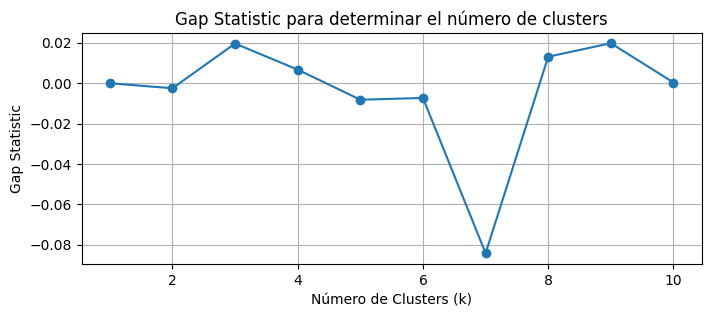

In [62]:
print("Número óptimo de clusters según el Gap Statistic:", optimal_k)

plt.figure(figsize=(8, 3))
plt.plot(range(1, max_k + 1), gaps, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic para determinar el número de clusters')
plt.grid()
plt.show()

#### Aplicación del modelo

In [63]:
kmeans = KMeans(n_clusters=5, random_state=42,
                init='k-means++', n_init=5, algorithm='elkan')
kmeans.fit(X_reducido) #Entrenamos el modelo
y_pred = kmeans.predict(X_reducido)

In [64]:
np.array_equal(y_pred, kmeans.labels_)

True

In [65]:
X_reducido['Etiquetas KMeans'] = kmeans.labels_
X_reducido['Etiquetas KMeans'] = X_reducido['Etiquetas KMeans'].astype('category')
X_reducido.head()

/tmp/ipython-input-766287580.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-766287580.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,humedadSuelo_porc,pHSuelo,temperatura_c,Etiquetas KMeans
0,0.916515,-0.890554,-1.373656,2
1,-0.690499,1.194214,1.026566,0
2,0.259235,1.060789,0.482206,0
3,-0.929420,-0.823842,1.714281,3
4,0.949230,0.860651,-0.596829,2


In [66]:
np.set_printoptions(precision=6)
kmeans.cluster_centers_

array([[-0.168312,  0.91009 ,  1.105405],
       [ 0.983099, -0.762588,  0.647716],
       [ 0.953461,  0.128302, -1.046334],
       [-0.92995 , -0.861311, -0.050611],
       [-0.670055,  1.037069, -0.783061]])

In [67]:
fig = px.scatter_3d(X_reducido, x='humedadSuelo_porc', y='pHSuelo', z='temperatura_c',
                    color='Etiquetas KMeans',
                    title='Dispersión de las variedades de cultivo (K-means)')
fig.show()

In [68]:
fig = px.scatter_3d(X_reducido, x='humedadSuelo_porc', y='pHSuelo', z='temperatura_c',
                    color=y,
                    title='Dispersión de las variedades de trigo (original)')
fig.show()

Observando los gráficos de la distribución original y como queda con Kmeans aplicado, se puede decir que en esta última se detectaron clusters que denotan subgrupos, entre las tres categorías originales.

### **Clustering jerárquico**

In [78]:
 # Columnas elegidas
X =  datos_final[['humedadSuelo_porc', 'rendimientoKg_hectarea']].values

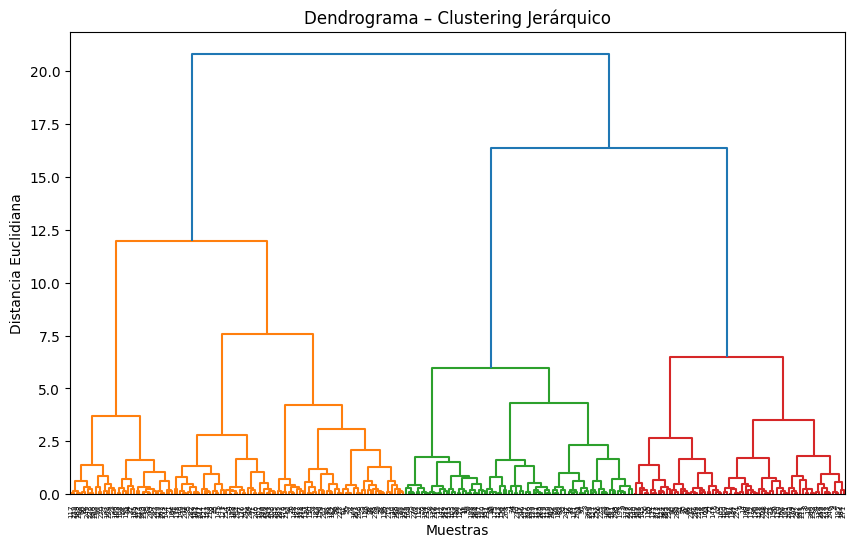

In [79]:
# Dendrograma para visualizar la estructura de los clusters
plt.figure(figsize=(10,6))
sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrograma – Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia Euclidiana')
plt.show()

In [80]:
# Encontrar el número óptimo de clusters usando Silhouette Score
rango_k = range(2, 11)
mejor_k = 2
mejor_score = -1

for k in rango_k:
    hc = AgglomerativeClustering(n_clusters=k, linkage='ward')
    etiquetas = hc.fit_predict(X)
    score = silhouette_score(X, etiquetas)
    print(f"k={k}  Silhouette Score={score:.3f}")
    if score > mejor_score:
        mejor_score = score
        mejor_k = k

print(f"\nNúmero óptimo de clusters según Silhouette: {mejor_k}")

# Ajustar el modelo final con el número óptimo de clusters
hc_final = AgglomerativeClustering(n_clusters=mejor_k, linkage='ward')
y_hc = hc_final.fit_predict(X)

k=2  Silhouette Score=0.358
k=3  Silhouette Score=0.391
k=4  Silhouette Score=0.408
k=5  Silhouette Score=0.400
k=6  Silhouette Score=0.370
k=7  Silhouette Score=0.374
k=8  Silhouette Score=0.373
k=9  Silhouette Score=0.373
k=10  Silhouette Score=0.368

Número óptimo de clusters según Silhouette: 4


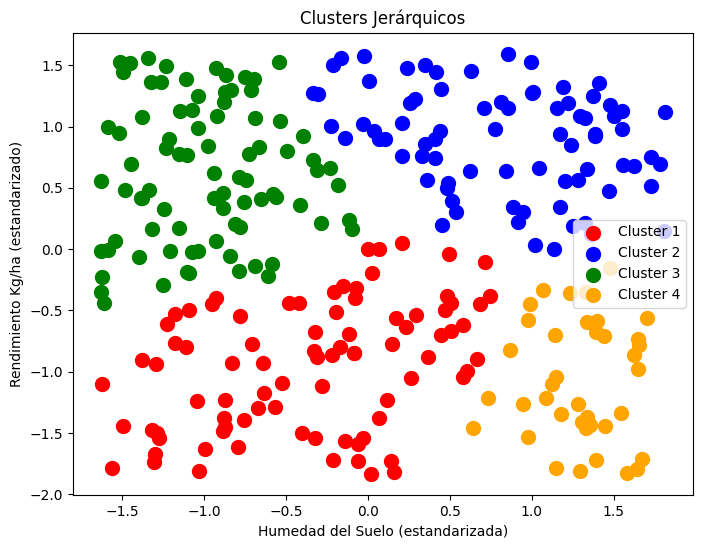

In [82]:
# Graficar los clusters en 2D
plt.figure(figsize=(8,6))
colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'olive']

for i in range(mejor_k):
    plt.scatter(X[y_hc == i, 0], X[y_hc == i, 1],
                s=100, c=colores[i], label=f'Cluster {i+1}')

plt.xlabel('Humedad del Suelo (estandarizada)')
plt.ylabel('Rendimiento Kg/ha (estandarizado)')
plt.title('Clusters Jerárquicos')
plt.legend()
plt.show()

K = 4 significa que, aunque haya cierto solapamiento, la partición en 4 grupos es la que mejor balancea cohesión interna (los puntos se parecen dentro de cada grupo) y separación externa (los clusters están bien diferenciados).

Detalles:

Cluster 1: baja humedad bajo rendimiento.
Cluster 2: alta humedad alto rendimiento.
Cluster 3: baja humedad alto rendimiento.
Cluster 4: alta humedad bajo rendimiento.

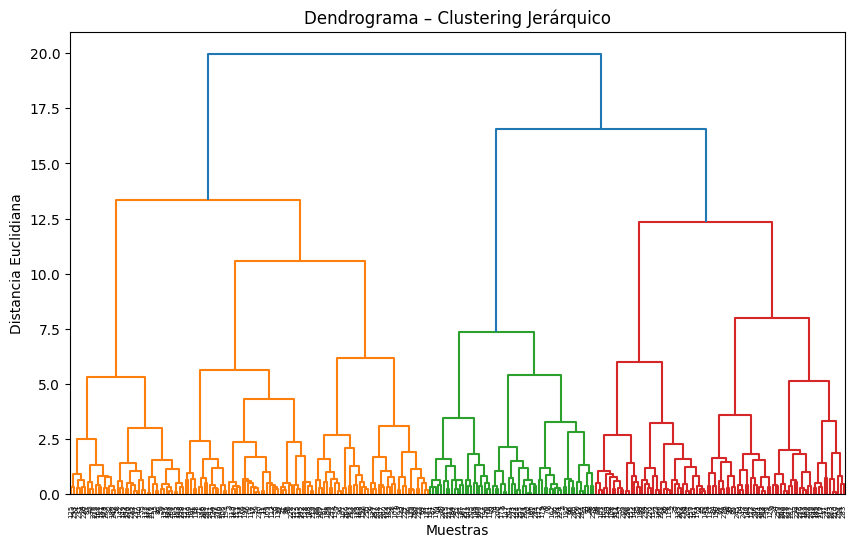

In [73]:
# Tres columnas numéricas para 3D
X = datos_final[['humedadSuelo_porc', 'rendimientoKg_hectarea', 'temperatura_c']].values

# Dendrograma para visualizar la estructura de clusters
plt.figure(figsize=(10,6))
sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrograma – Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia Euclidiana')
plt.show()


In [74]:
# Número óptimo de clusters usando Silhouette Score
rango_k = range(2, 11)
mejor_k = 2
mejor_score = -1

for k in rango_k:
    hc = AgglomerativeClustering(n_clusters=k, linkage='ward')
    etiquetas = hc.fit_predict(X)
    score = silhouette_score(X, etiquetas)
    print(f"k={k}  Silhouette Score={score:.3f}")
    if score > mejor_score:
        mejor_score = score
        mejor_k = k

print(f"\nNúmero óptimo de clusters según Silhouette: {mejor_k}")

k=2  Silhouette Score=0.224
k=3  Silhouette Score=0.231
k=4  Silhouette Score=0.233
k=5  Silhouette Score=0.244
k=6  Silhouette Score=0.263
k=7  Silhouette Score=0.253
k=8  Silhouette Score=0.247
k=9  Silhouette Score=0.238
k=10  Silhouette Score=0.242

Número óptimo de clusters según Silhouette: 6


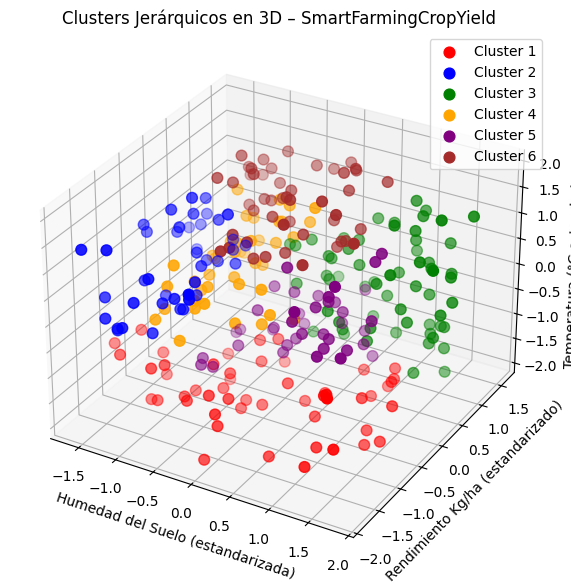

In [75]:
# Ajustar el modelo final con el número óptimo de clusters
hc_final = AgglomerativeClustering(n_clusters=mejor_k, linkage='ward')
y_hc = hc_final.fit_predict(X)

# Graficar clusters en 3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'olive']

for i in range(mejor_k):
    ax.scatter(X[y_hc == i, 0], X[y_hc == i, 1], X[y_hc == i, 2],
               s=60, c=colores[i], label=f'Cluster {i+1}')

ax.set_xlabel('Humedad del Suelo (estandarizada)')
ax.set_ylabel('Rendimiento Kg/ha (estandarizado)')
ax.set_zlabel('Temperatura (°C estandarizada)')
ax.set_title('Clusters Jerárquicos en 3D – SmartFarmingCropYield')
ax.legend()
plt.show()

Grupos relativamente bien separados y mas compactos

k=1 → Gap = -2.4874
k=2 → Gap = -2.4484
k=3 → Gap = -2.4207
k=4 → Gap = -2.4022
k=5 → Gap = -2.3936
k=6 → Gap = -2.3861
k=7 → Gap = -2.3821
k=8 → Gap = -2.3726
k=9 → Gap = -2.3644
k=10 → Gap = -2.3632
Número óptimo de clusters (Gap Statistic): 10


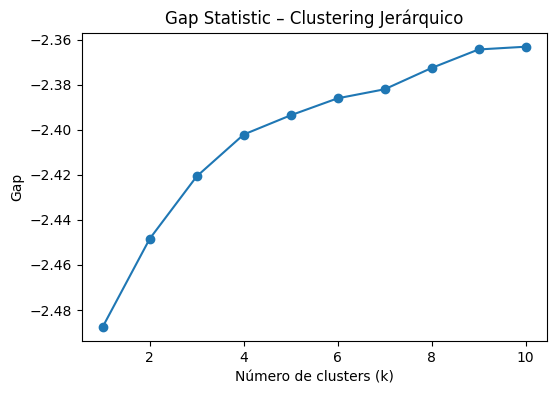

In [85]:
# Escalamos a [0,1] porque las variables tienen distintas escalas
scaler = StandardScaler()
X_reducido = scaler.fit_transform(x)

# Función para calcular la “inercia” en clustering jerárquico
def hierarchical_intra_cluster_dispersion(X, k):
    """
    Calcula la suma de distancias cuadradas de cada punto
    a su centroide, dado un número de clusters k,
    usando AgglomerativeClustering.
    """
    hc = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    labels = hc.fit_predict(X)

    dispersion = 0.0
    for cluster_id in np.unique(labels):
        cluster_points = X[labels == cluster_id]
        centroid = cluster_points.mean(axis=0)
        # Distancias cuadradas al centroide
        dists = np.sum((cluster_points - centroid) ** 2)
        dispersion += dists
    return dispersion

# Gap Statistic
gaps = []
max_k = 10
n_refs = 20  # número de datasets aleatorios de referencia

for k in range(1, max_k + 1):
    # inercia real con clustering jerárquico
    real_inertia = hierarchical_intra_cluster_dispersion(X_reducido, k)

    # inercia de datasets aleatorios con misma forma que X_reducido
    inertia_list = []
    for _ in range(n_refs):
        random_data = np.random.rand(*X_reducido.shape)
        rand_inertia = hierarchical_intra_cluster_dispersion(random_data, k)
        inertia_list.append(rand_inertia)

    reference_inertia = np.mean(inertia_list)

    gap = np.log(reference_inertia) - np.log(real_inertia)
    gaps.append(gap)
    print(f"k={k} → Gap = {gap:.4f}")

# Seleccionar k óptimo
optimal_k = np.argmax(gaps) + 1
print("Número óptimo de clusters (Gap Statistic):", optimal_k)

# Gráfico
plt.figure(figsize=(6,4))
plt.plot(range(1, max_k + 1), gaps, marker='o')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Gap")
plt.title("Gap Statistic – Clustering Jerárquico")
plt.show()


El tramo  con caída ligera (6–8) sugiere que agregar más clusters ya no mejora demasiado la separación respecto a datos aleatorios.
Ese “codo” es una señal de que alrededor de 6–7 se podría tener un número razonable de grupos.

# **Conclusión**

Teniendo en cuenta lo visto, los datos del cultivo no poseen una relación lineal, ya que **PCA** no pudo detectar grupos concretos. Asimismo, **ISOMAP**, el cual debería detectar grupos con relación no lineal, tampoco logra una correcta visualización. Algo similar ocurre con **tSNE**, el cual reduce las dimensiones sin agrupar correctamente.

Por otro lado, **K-Means** logra un clustering más definido, incluso detectando subcategorías extra a las vistas en el dataset original. Algo parecido a lo que ocurre con **Clustering Jerárquico**, incluso teniendo en cuenta que Silhouette dio como valor óptimo cuatro clusters (o seis con tres componentes) y GAP, 10. En definitiva, estos dos últimos serían los más apróximados a la cantidad de categorías reales.